<font color='blue'> **McDonald Valley Problem** </font> 
<font color='red'> **B** </font> 

In [1]:
import os ; import matplotlib.pyplot as plt ; import numpy as np ; import flopy ; from pathlib import Path ; import pandas as pd 
sim_ws    = Path("./w01b")   ; sim_ws.mkdir(exist_ok=True)   ; exe_name = 'E:\\15_REPOS\\00_BETAMI\\bin\\mf2005.exe'  
datapth  = 'E:\\15_REPOS\\00_BETAMI\\bin\\Langevin'          ; name = 'mf2005'

In [2]:
delr = delc = 100. ; laycon = [1, 0, 0, 0, 0]  ; bot0 = -5 ; precip = 36 ; evap = 27 ; lake_area = 1.625e7 # inches per year /  feet squared
IC_strt =  11.     ; outer_maximum=50 ; inner_maximum=500  ; relaxation_factor=0.97

nper = 4 ; 

nlay, nrow, ncol = 5, 200, 125   ; ibound0 = np.empty((nrow * ncol), int)  ; fname = os.path.join(datapth, 'ibound1.dat') 
f1 = open(fname)                 ; ibound0 = flopy.utils.read1d(f1, ibound0).reshape((nrow, ncol))          

rech = np.empty((nrow * ncol), float)                                    ; fname = os.path.join(datapth, 'rech.dat')
f2 = open(fname)                 ; rech    = flopy.utils.read1d(f2, rech).reshape((nrow, ncol))            ; rech = rech * 0.00365 
rech_aquifer = np.where(ibound0>0, rech, 0) ; rech_lake = np.where(ibound0<0, (precip - evap) / 12. / 365., 0)

thick = np.empty((nrow * ncol), float)                                   ; fname = os.path.join(datapth, 'thick3.dat')
f3 = open(fname)                 ; thick   = flopy.utils.read1d(f3, thick).reshape((nrow, ncol))             

well_info = [[1,3,18,12.05],[2,4,11,11.63],[3,7,21,12.15],[4,13,23,11.44],[5,15,12,10.86],[6,17,19,10.80],[7,18,2,9.16],[8,19,7,8.82],[9,20,12,8.86],
             [10,19,23,10.65],[11,27,6,4.26],[12,28,12,4.19],[13,29,24,7.57],[14,31,7,2.70],[15,34,15,4.59],[16,37,2,2.76],[17,38,23,6.23]]
well_info = [('W {}'.format(id)  ,col*500.-250.  ,40*500-row*500+250   ,stage) for id,row,col,stage in well_info]
dt        = np.dtype([('name', 'S15'), ('x', float), ('y', float), ('stage', float)])                ; well_info = np.array(well_info, dtype=dt)
W1 = pd.DataFrame(well_info)   ; W1.to_csv (sim_ws/ "01_well_info.csv")

welspd = {1:[[5-1, 173-1, 78-1, -268000.0], [4-1, 28-1, 73-1, -67000.0]],
          2:[[5-1, 163-1, 28-1, -268000.0], [4-1, 28-1, 73-1, -67000.0]],
          3:[[4-1, 28-1, 73-1, -67000.0]]} # mf2005

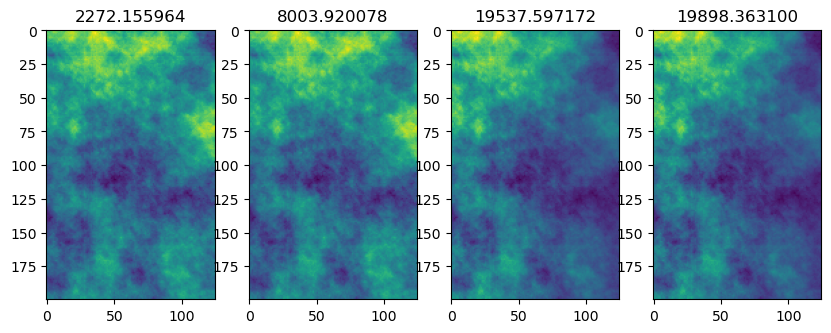

In [3]:
fig, axes = plt.subplots(ncols=4, figsize=(10, 4)) ; tran = []   
for k in range(1, nlay):
    tran_ = np.empty((nrow * ncol), float)                             ; fname = os.path.join(datapth, 'tran{}.dat'.format(k + 1)) 
    f4 = open(fname)  ; tran_ = flopy.utils.read1d(f4, tran_).reshape((nrow, ncol))                           ; tran.append(tran_)
    ax = axes[k - 1] ; cb = ax.imshow(tran_)                           ; ax.set_title('{:2f}'.format(tran_.mean()))
tranA = tran[-2] / tran[-1]   

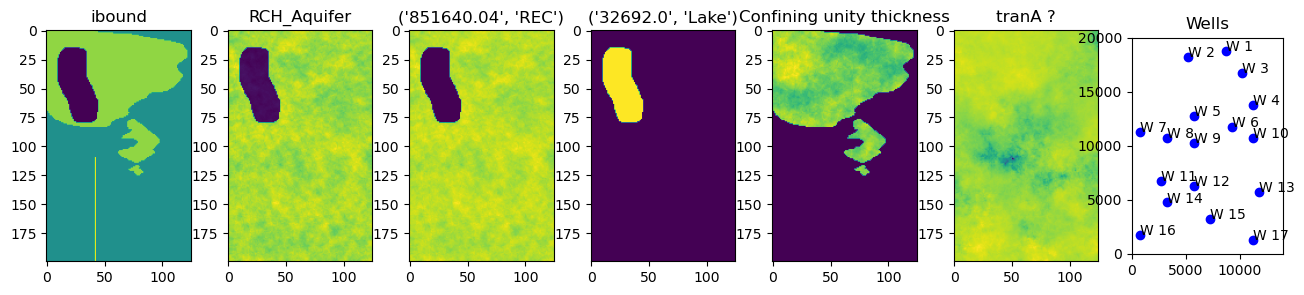

In [4]:
fig = plt.figure(figsize=(16, 3))
ax = fig.add_subplot(171, aspect="equal") ; plt.imshow(ibound0)       ; plt.title('ibound')
ax = fig.add_subplot(172, aspect="equal") ; plt.imshow(rech)          ; plt.title('RCH_Aquifer')
ax = fig.add_subplot(173, aspect="equal") ; plt.imshow(rech_aquifer)  ; plt.title(('{}'.format(round(rech_aquifer.sum()*100*100,2)),'REC'))
ax = fig.add_subplot(174, aspect="equal") ; plt.imshow(rech_lake)     ; plt.title(('{}'.format(round(rech_lake.sum()*100*100,0)),'Lake'))
ax = fig.add_subplot(175, aspect="equal") ; plt.imshow(thick)         ; plt.title('Confining unity thickness')
ax = fig.add_subplot(176, aspect="equal") ; plt.imshow(tranA)         ; plt.title('tranA ?')
ax = fig.add_subplot(177, aspect='equal') ; ax.plot(well_info['x'], well_info['y'], 'bo') ; ax.set_xlim(0, 28 * 500) ; ax.set_ylim(0, 40 * 500)
for name, x, y, stage in well_info:     ax.text(x, y, name.decode())  ; plt.title('Wells')

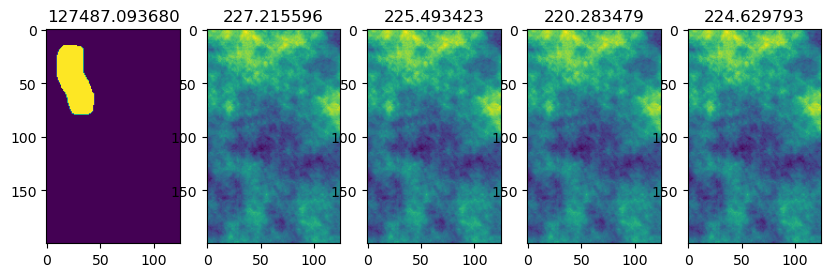

In [5]:
hk = []  ; fig, axes = plt.subplots(ncols=5, figsize=(10, 4)) 
for k in range(nlay):
    hk_ = np.empty((nrow * ncol), float)                                   ; fname = os.path.join(datapth, 'hk{}.dat'.format(k + 1)) 
    f5 = open(fname) ; hk_ = flopy.utils.read1d(f5, hk_).reshape((nrow, ncol))                                      ; hk.append(hk_)
    ax = axes[k] ; cb = ax.imshow(hk_)                                     ;  ax.set_title('{:2f}'.format(hk_.mean()))                    

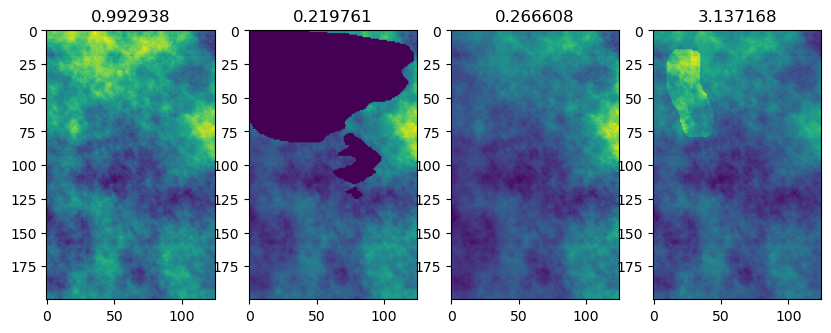

In [6]:
vcont = [] ; fig, axes = plt.subplots(ncols=4, figsize=(10, 4))
for k in range(nlay - 1):
    vcont_ = np.empty((nrow * ncol), float)                            ; fname = os.path.join(datapth, 'vcont{}.dat'.format(k + 1)) 
    f6 = open(fname)  ; vcont_ = flopy.utils.read1d(f6, vcont_).reshape((nrow, ncol))                        ; vcont.append(vcont_)
    ax = axes[k - 1] ; cb = ax.imshow(vcont_)                          ; ax.set_title('{:2f}'.format(vcont_.mean()))

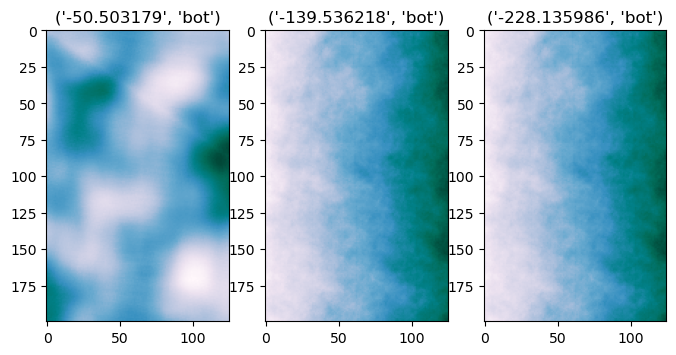

In [7]:
bot = [] ; fig, axes = plt.subplots(ncols=3, figsize=(8, 4))
for k in range(2, nlay):
    bot_ = np.empty((nrow * ncol), float)                                  ; fname = os.path.join(datapth, 'bot{}.dat'.format(k + 1)) 
    f7 = open(fname) ; bot_ = flopy.utils.read1d(f7, bot_).reshape((nrow, ncol))                                   ; bot.append(bot_)
    ax = axes[k - 2] ; cb = ax.imshow(bot_, cmap='PuBuGn')                 ; ax.set_title(('{:2f}'.format(bot_.mean()),'bot'))

In [8]:
idomain=[1 ,1 ,np.where(thick==0,-1,1) ,1 ,1] ; vani=.01 ;kv=[hk[0]*vani,hk[1]*vani,0.001,hk[3]*vani,hk[4]*vani]  #; ii,jj=np.where(ibound0<0)

nriv = 200 - 110  ; rivstage = np.linspace(1.79, 0.01, nriv)  ;  rbot = np.linspace(-0.210, -1.99, nriv) ; RIV_spd = []
for iriv in range(nriv):     RIV_spd.append([0, iriv + 110, 42, rivstage[iriv], 80000, rbot[iriv]])

drnspd = {3: [[1 - 1, 113-1, 98 - 1, 2., 1000000.]]}


In [9]:
m2005 = flopy.modflow.Modflow         (modelname = 'mf2005', model_ws = sim_ws, exe_name=exe_name)
dis = flopy.modflow.ModflowDis  (m2005, nlay=nlay, nrow=nrow, ncol=ncol, delr=100, delc=100,top=0., botm=[-5, -6, -7, -8, -9], nper=4)
#bas = flopy.modflow.ModflowBas  (m2005, strt=11., ibound=[ibound0, 1, 1, 1, 1])
bas = flopy.modflow.ModflowBas  (m2005, strt=11., ibound=[1, 1, 1, 1, 1])
bcf = flopy.modflow.ModflowBcf  (m2005, laycon=[1, 0, 0, 0, 0], hy=[hk[0], -999., -999., -999., -999.],
                                 tran=[-999., tran[0], tran[1], tran[2], tran[3]],vcont=vcont)
riv = flopy.modflow.ModflowRiv  (m2005, stress_period_data=RIV_spd, ipakcb=-1)
rch = flopy.modflow.ModflowRch  (m2005, rech=rech_aquifer + rech_lake)
wel = flopy.modflow.ModflowWel  (m2005, stress_period_data = welspd)
drn = flopy.modflow.ModflowDrn  (m2005, stress_period_data = drnspd)
pcg = flopy.modflow.ModflowPcg  (m2005, iter1=100, hclose=0.0001, rclose=1.0)
ocspd = {}
for kper in range(dis.nper): 
    ocspd[(kper, 0)] = ['print head', 'save head', 'print budget', 'save budget']
oc = flopy.modflow.ModflowOc(m2005, stress_period_data=ocspd)
oc.reset_budgetunit(budgetunit=50, fname='mf2005' + '.bud')
m2005.write_input()
m2005.run_model()

FloPy is using the following executable to run the model: ..\..\..\00_BETAMI\bin\mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.6.01 3/4/2009, with FMP2              

 Using NAME file: mf2005.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2025/07/17 10:17:39

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     3    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     4    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2025/07/17 10:18:00
 Elapsed run time: 20.585 Seconds

  Normal termination of simulation


(True, [])

In [10]:
hdobj = flopy.utils.HeadFile(os.path.join(sim_ws, 'mf2005' + '.hds')) ; headall = hdobj.get_alldata() ; head = headall[kper]

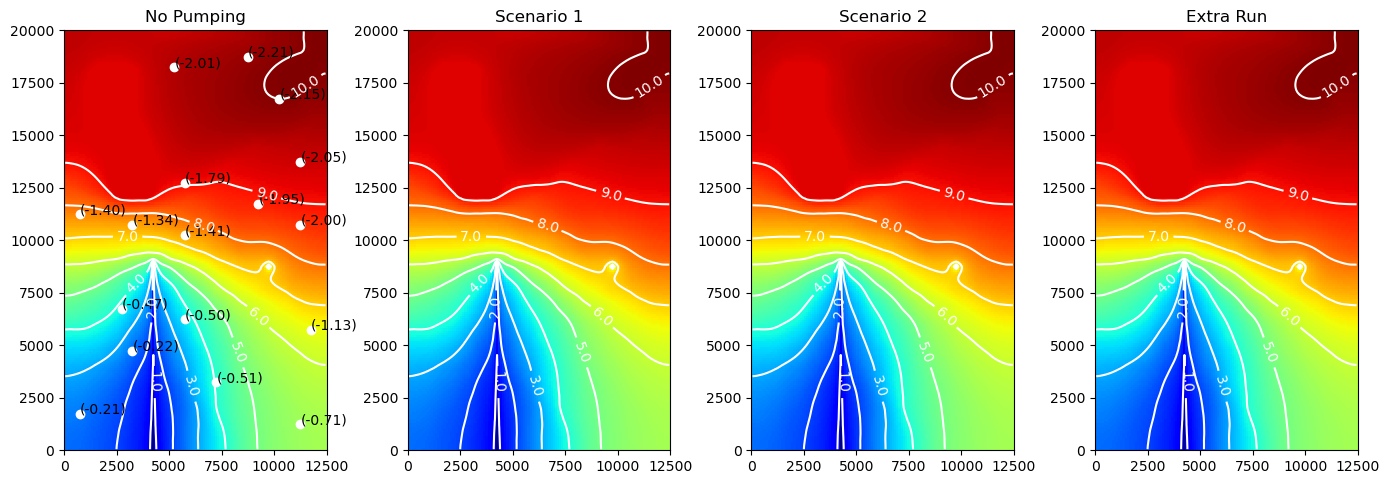

In [20]:
fig = plt.figure(figsize=(17, 12))   ; titles = ['No Pumping', 'Scenario 1', 'Scenario 2', 'Extra Run']
for kper in range(dis.nper):
    ax = fig.add_subplot(2, dis.nper, kper + 1, aspect='equal')  ; pmv = flopy.plot.PlotMapView(m2005)
    qm = pmv.plot_array(head, cmap='jet')                        ; cs = pmv.contour_array(head, levels=np.arange(20), colors='white')
    ax.clabel(cs, inline=1, fontsize=10, fmt='%1.1f')            ; ax.set_title(titles[kper])
    if kper == 0: 
        ax.plot(well_info['x'], well_info['y'], 'wo')
        for id, (welname, x, y, stage) in enumerate(well_info):
            row, column = m2005.modelgrid.intersect(x, y)  ; r = head[0, row, column] - stage ; color = 'black'
            if r > 0:                                                                           color = 'red'
            ax.text(x, y, '({:.2f})'.format(r), color=color)

In [12]:
label = ['no pumping', 'scenario A', 'scenario B', 'Extra Run']
for kper in range(dis.nper):
    hlake = headall[kper][0, ibound0 == -2]  ; print(label[kper] + ' lake stage:', hlake.max())

no pumping lake stage: 11.000048
scenario A lake stage: 8.950214
scenario B lake stage: 9.334531
Extra Run lake stage: 9.23731


In [13]:
fname = os.path.join(sim_ws, 'mf2005' + '.bud')                   ; budobj = flopy.utils.CellBudgetFile(fname)
riv0 = budobj.get_data(kstpkper=(0, 0), text='RIVER LEAKAGE')[0]  ; riv1 = budobj.get_data(kstpkper=(0, 1), text='RIVER LEAKAGE')[0]
riv2 = budobj.get_data(kstpkper=(0, 2), text='RIVER LEAKAGE')[0]  ; drn3 = budobj.get_data(kstpkper=(0, 3), text='DRAINS')[0]

Text(0, 0.5, 'Discharge to river (ft^3/day)')

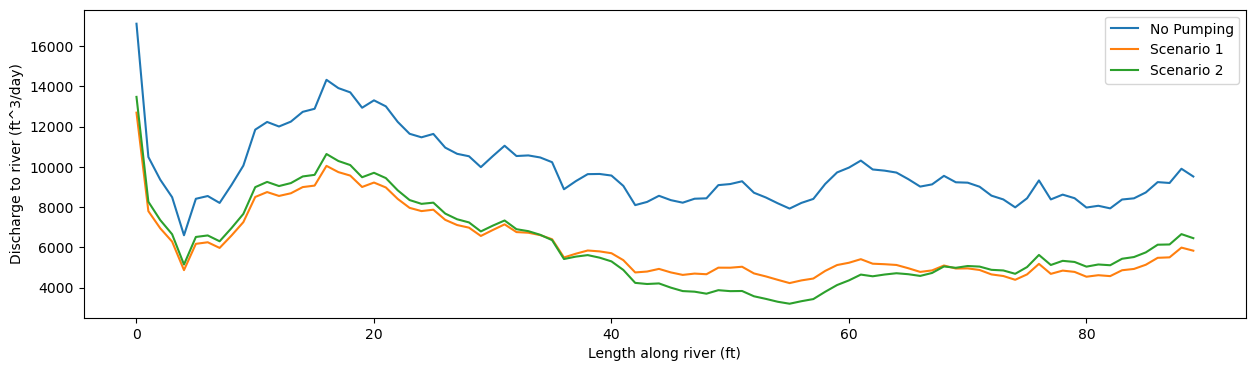

In [14]:
fig = plt.figure(figsize=(15, 4)) ; ax = fig.add_subplot(1, 1, 1)
ax.plot(abs(riv0['q']), label='No Pumping') ; ax.plot(abs(riv1['q']), label='Scenario 1') ; ax.plot(abs(riv2['q']), label='Scenario 2')
ax.legend() ; ax.set_xlabel('Length along river (ft)') ; ax.set_ylabel('Discharge to river (ft^3/day)')

In [15]:
headsc0 = headall[0]  ; headsc1 = headall[1]  ; headsc2 = headall[2]  ; headsc3 = headall[3]
dd1 = headsc0[:, 0:16*5, :] - headsc1[:, 0:16*5, :] ; print('Max drawdown in northern part (Scen 1): ', dd1.max())
dd2 = headsc0[:, 0:16*5, :] - headsc2[:, 0:16*5, :] ; print('Max drawdown in northern part (Scen 2): ', dd2.max())

Max drawdown in northern part (Scen 1):  4.015389
Max drawdown in northern part (Scen 2):  3.5305476


Text(0.5, 1.0, 'Extra Run H (min: 0.12; max: 10.1) L1')

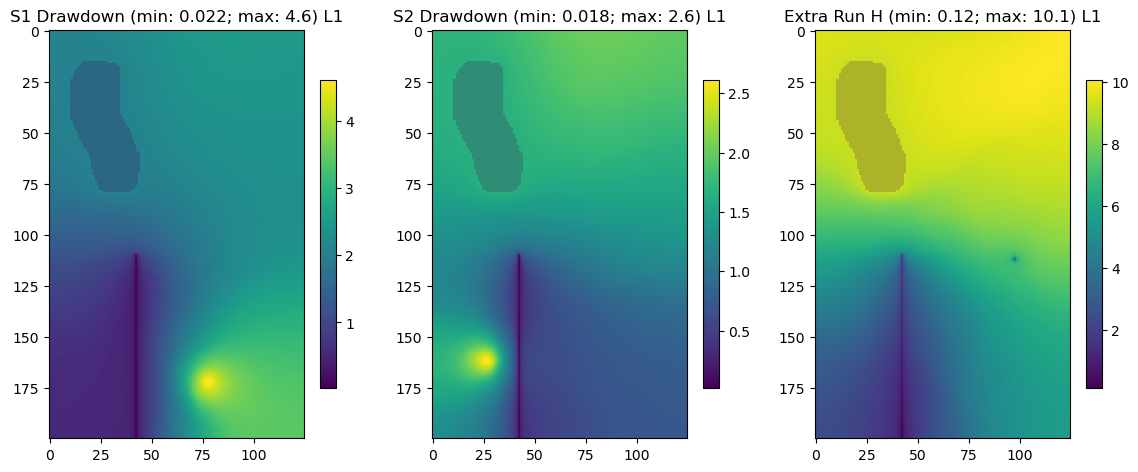

In [16]:
fig = plt.figure(figsize=(14, 8)) 
ilay = 0 ; ax = fig.add_subplot(131, aspect='equal')
dd = headsc0 - headsc1 ; dd = dd[0] ; c = ax.imshow(dd) ; plt.colorbar(c, shrink=0.5) ; plt.imshow(np.ma.masked_where(ibound0 != -2, ibound0), alpha=0.2)
ttl = 'S1 Drawdown (min: {:.2}; max: {:.2})'.format(dd.min(), dd.max()) ; ttl += ' L{}'.format(ilay + 1) ; ax.set_title(ttl)
ilay = 0 ; ax = fig.add_subplot(132, aspect='equal')
dd = headsc0 - headsc2 ; dd = dd[0] ; c = ax.imshow(dd) ; plt.colorbar(c, shrink=0.5) ; plt.imshow(np.ma.masked_where(ibound0 != -2, ibound0), alpha=0.2)
ttl = 'S2 Drawdown (min: {:.2}; max: {:.2})'.format(dd.min(), dd.max()) ; ttl += ' L{}'.format(ilay + 1) ; ax.set_title(ttl)
ilay = 0 ; ax = fig.add_subplot(133, aspect='equal')
hd = headsc3[ilay] ; c = ax.imshow(hd) ; plt.colorbar(c, shrink=0.5) ; plt.imshow(np.ma.masked_where(ibound0 != -2, ibound0), alpha=0.2)
ttl = 'Extra Run H (min: {:.3}; max: {:.3})'.format(hd.min(), hd.max()) ; ttl += ' L{}'.format(ilay + 1) ; ax.set_title(ttl)